HW3: EE559 - Hardik Prajapati(2678294168) 

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
import matplotlib.pyplot as plt  
from sklearn import metrics
from imblearn.over_sampling import SMOTE


(a) Download the WPBC data from: https://archive.ics.uci.edu/ml/datasets/ Breast+Cancer+Wisconsin+(Diagnostic).


In [7]:
col_names = ['ID', 'outcome', 'time']
count = 1
for i in range(32):
    feat = 'feat_' + str(count)
    count += 1
    col_names.append(feat)

df = pd.read_csv("../data/wpbc.data", names=col_names)
df

,ID,outcome,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


(b) Select the first 130 non-recurrent cases and the first 37 recurrent cases as your training set. Add record #197 in the data set to your training set as well. (10 pts)


In [8]:
train_df = df.loc[df['outcome'] == 'N'].head(130)
test_df = df.loc[df['outcome'] == 'N'].tail(21)
train_df = train_df.append(df.loc[df['outcome'] == 'R'].head(37))
test_df = test_df.append(df.loc[df['outcome'] == 'R'].tail(10))
entry = df.loc[196]
train_df = train_df.append(entry, ignore_index = True)
train_df

,ID,outcome,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.1213,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,9010018,R,5,15.08,25.74,98.00,716.6,0.10240,0.09769,0.1235,...,121.20,1050.0,0.1660,0.2356,0.4029,0.1526,0.2654,0.09438,2.6,0
164,9012000,R,2,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.2448,...,195.00,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1
165,906023,R,49,15.50,21.08,102.90,803.1,0.11200,0.15710,0.1522,...,157.10,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480,0.4,0
166,908194,R,1,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.2133,...,146.00,1479.0,0.1665,0.2942,0.5308,0.2173,0.3032,0.08075,4.5,27


(c) There are four instances in your training set that are missing the lymph node feature (denoted as ?). This is not a very severe issue, so replace the missing features with the median of the lymph node feature in your training set. (5 pts)

In [9]:
train_df.loc[train_df['feat_32'] == '?']

,ID,outcome,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32
4,844359,N,60,18.98,19.61,124.40,1112.0,0.09087,0.1237,0.1213,...,152.6,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,?
22,854253,N,12,16.74,21.59,110.10,869.5,0.09610,0.1336,0.1348,...,133.5,1229.0,0.1563,0.3835,0.5409,0.1813,0.4863,0.08633,1.5,?
63,877500,N,72,14.45,20.22,94.49,642.7,0.09872,0.1206,0.1180,...,117.9,1044.0,0.1552,0.4056,0.4967,0.1838,0.4753,0.10130,1.5,?
167,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.1939,0.2380,...,198.3,2375.0,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3.0,?


In [10]:
median = train_df['feat_32'].loc[train_df['feat_32'] != '?'].median()
train_df['feat_32'] = train_df['feat_32'].replace('?', median)
train_df = train_df.drop('time', axis=1)
train_df

,ID,outcome,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32
0,119513,N,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.1086,0.07055,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.1255,0.08180,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,844359,N,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.1213,0.08910,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,9010018,R,15.08,25.74,98.00,716.6,0.10240,0.09769,0.1235,0.06553,...,121.20,1050.0,0.1660,0.2356,0.4029,0.1526,0.2654,0.09438,2.6,0
164,9012000,R,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.2448,0.15010,...,195.00,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3.0,1
165,906023,R,15.50,21.08,102.90,803.1,0.11200,0.15710,0.1522,0.08481,...,157.10,1748.0,0.1517,0.4002,0.4211,0.2134,0.3003,0.10480,0.4,0
166,908194,R,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.2133,0.12590,...,146.00,1479.0,0.1665,0.2942,0.5308,0.2173,0.3032,0.08075,4.5,27


In [11]:
test_df

,ID,outcome,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32
174,927997,N,27,18.11,26.17,118.70,970.2,0.09867,0.17160,0.21770,...,145.10,1251.0,0.14640,0.51270,0.87740,0.26030,0.3941,0.09318,2.4,2
175,928594,N,29,21.93,30.64,146.70,1487.0,0.08679,0.17230,0.20530,...,171.50,1951.0,0.11680,0.40720,0.44940,0.18860,0.2784,0.07353,3.5,0
178,931678,N,24,24.29,25.48,161.80,1715.0,0.09374,0.22840,0.27020,...,184.80,2213.0,0.12470,0.39350,0.61180,0.20630,0.3983,0.07978,1.2,0
179,935058,N,13,15.60,26.79,99.85,760.0,0.07885,0.05240,0.03778,...,117.20,1027.0,0.10970,0.09745,0.12630,0.08222,0.2805,0.06378,2.0,2
180,935878,N,13,15.78,17.10,102.20,769.0,0.09668,0.09030,0.07268,...,111.70,921.4,0.13860,0.26400,0.29010,0.12340,0.3261,0.07752,0.8,0
181,937100,N,12,19.28,20.88,124.90,1127.0,0.09033,0.11970,0.06435,...,130.00,1214.0,0.09273,0.12590,0.08201,0.11160,0.2147,0.05644,2.5,0
182,937653,N,15,15.66,24.51,102.00,771.1,0.08886,0.08731,0.09483,...,124.00,1066.0,0.11820,0.24860,0.35080,0.12730,0.2964,0.06591,2.0,4
183,937654,N,11,22.44,27.42,150.60,1504.0,0.12110,0.20820,0.35790,...,161.20,1689.0,0.13300,0.25800,0.47410,0.21350,0.2809,0.06318,1.0,0
184,937664,N,17,17.98,23.96,120.00,995.0,0.11570,0.17390,0.19540,...,135.20,1225.0,0.13400,0.26060,0.31240,0.17530,0.2746,0.07830,2.5,0
185,937897,N,17,13.63,24.70,89.65,569.2,0.10550,0.13120,0.11610,...,107.70,712.2,0.15540,0.35150,0.34090,0.16890,0.2739,0.09945,2.0,0


In [12]:
test_df = test_df.head(30)
test_df

,ID,outcome,time,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32
174,927997,N,27,18.11,26.17,118.70,970.2,0.09867,0.17160,0.21770,...,145.10,1251.0,0.14640,0.51270,0.87740,0.26030,0.3941,0.09318,2.4,2
175,928594,N,29,21.93,30.64,146.70,1487.0,0.08679,0.17230,0.20530,...,171.50,1951.0,0.11680,0.40720,0.44940,0.18860,0.2784,0.07353,3.5,0
178,931678,N,24,24.29,25.48,161.80,1715.0,0.09374,0.22840,0.27020,...,184.80,2213.0,0.12470,0.39350,0.61180,0.20630,0.3983,0.07978,1.2,0
179,935058,N,13,15.60,26.79,99.85,760.0,0.07885,0.05240,0.03778,...,117.20,1027.0,0.10970,0.09745,0.12630,0.08222,0.2805,0.06378,2.0,2
180,935878,N,13,15.78,17.10,102.20,769.0,0.09668,0.09030,0.07268,...,111.70,921.4,0.13860,0.26400,0.29010,0.12340,0.3261,0.07752,0.8,0
181,937100,N,12,19.28,20.88,124.90,1127.0,0.09033,0.11970,0.06435,...,130.00,1214.0,0.09273,0.12590,0.08201,0.11160,0.2147,0.05644,2.5,0
182,937653,N,15,15.66,24.51,102.00,771.1,0.08886,0.08731,0.09483,...,124.00,1066.0,0.11820,0.24860,0.35080,0.12730,0.2964,0.06591,2.0,4
183,937654,N,11,22.44,27.42,150.60,1504.0,0.12110,0.20820,0.35790,...,161.20,1689.0,0.13300,0.25800,0.47410,0.21350,0.2809,0.06318,1.0,0
184,937664,N,17,17.98,23.96,120.00,995.0,0.11570,0.17390,0.19540,...,135.20,1225.0,0.13400,0.26060,0.31240,0.17530,0.2746,0.07830,2.5,0
185,937897,N,17,13.63,24.70,89.65,569.2,0.10550,0.13120,0.11610,...,107.70,712.2,0.15540,0.35150,0.34090,0.16890,0.2739,0.09945,2.0,0


In [13]:
train_df.loc[train_df['feat_32'] == '?']

,ID,outcome,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32


(d) Binary Classification Using Na ̈ıve Bayes’ Classifiers



i. Solve the problem using a Na ̈ıve Bayes’ classifier. Use Gaussian class condi- tional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets. (10 pts)

In [14]:
gnb = GaussianNB()
X_train = train_df.drop('outcome', axis=1)
y_train = train_df['outcome']
X_test = test_df.drop(['outcome', 'time'], axis=1)
y_test = test_df['outcome']
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_score=gnb.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
report=classification_report(y_test,y_pred)
print(report)

[[15  6]
 [ 8  1]]
              precision    recall  f1-score   support

           N       0.65      0.71      0.68        21
           R       0.14      0.11      0.12         9

    accuracy                           0.53        30
   macro avg       0.40      0.41      0.40        30
weighted avg       0.50      0.53      0.51        30



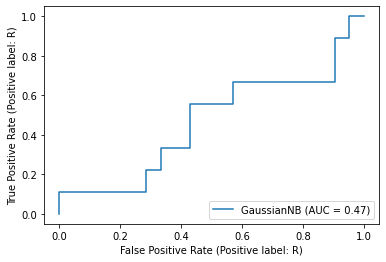

In [15]:
#plotting roc for test data set
metrics.plot_roc_curve(gnb, X_test, y_test) 
plt.show()

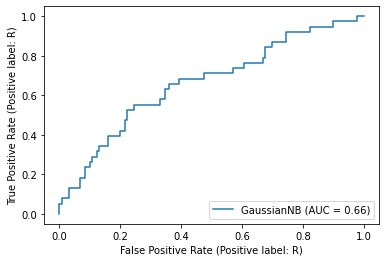

In [16]:
#plotting roc for training data set
metrics.plot_roc_curve(gnb, X_train, y_train)
plt.show()

Balance your data set using SMOTE

[[11 10]
 [ 4  5]]
              precision    recall  f1-score   support

           N       0.73      0.52      0.61        21
           R       0.33      0.56      0.42         9

    accuracy                           0.53        30
   macro avg       0.53      0.54      0.51        30
weighted avg       0.61      0.53      0.55        30



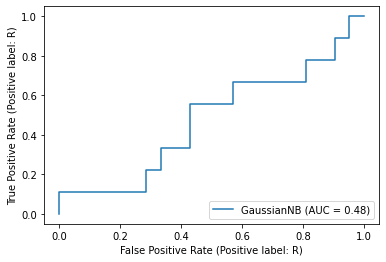

In [17]:
resample = SMOTE(random_state=42)
X_train_res, y_train_res = resample.fit_resample(X_train, y_train)
y_res_pred = gnb.fit(X_train_res, y_train_res).predict(X_test)
y_score=gnb.predict_proba(X_test)
cm_res = confusion_matrix(y_test, y_res_pred)
print(cm_res)
report_res=classification_report(y_test,y_res_pred)
print(report_res)
#plotting roc for test data set_resampled
metrics.plot_roc_curve(gnb, X_test, y_test) 
plt.show()

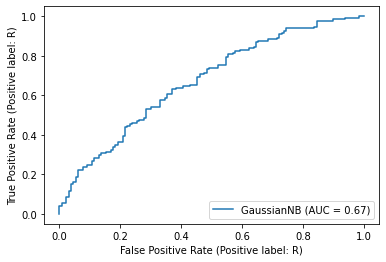

In [18]:
#plotting roc for training data set_resampled
metrics.plot_roc_curve(gnb, X_train_res, y_train_res)
plt.show()